In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

C:\Users\lgaddam\AppData\Local\Temp\ipykernel_56096\3777615979.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


## Author: **Lokesh Gaddam** <br>
## Date: **12/12/2024** <br>
## Assignment : **BoomBikes bikes sharing system** 

## **Problem Statement**

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

* Which variables are significant in predicting the demand for shared bikes
* How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

## **Business Goal of the Assignment**
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

## **Below are the steps to be followed**
1. Extracting the data , undersanding and visualizaing the data to make first level inferences 
2. Preparation of the data for model training which includes train-test split and rescaling based on the insights 
3. Training the model 
4. Perform Residual analysis 
5. FInally prediction and evaluation of the test set 

## **Step1 : Extraction , Cleaning and Understanding the data** ( EDA )
    

**1.1Extraction**

In [2]:
# Importing the required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import mean_squared_error 


**1.2Reading and interpreting the data set** 

In [3]:
#Read the csv file using pandas
df = pd.read_csv('day.csv')

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# checking the shape of the data set 
df.shape

(730, 16)

In [6]:
# describe the data set to see the different metrics 
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# checking the info of the data set to check the data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


**There are 730 rows and 16 columns in the data set. There are no null values in any of the columns**


**Checking for NULL values**

In [8]:
# checking for null values 
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**No missing values in the data set**

**Rename some of the columns for easy reference and analysis**

In [9]:
df.rename(columns ={'yr':'year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True)

In [10]:
df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
#df['year']=df.season.map({1: '2019', 0: '2018'})

**Converting categorical values 0,1,2,3 to actual descriptive values for proper analysis**

In [11]:
# convering the cateo=gorical values of columns season

df['season']=df.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
df['month']=df.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df['weathersit']=df.weathersit.map({1: 'Clear',2:'Mist & Cloudy',3:'Light Snow',4:'Snow & Fog'})
#df['weekday']=df.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

df['weekday']=df.weekday.map({1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'})



    
df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,Jan,0,Mon,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tues,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thurs,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [22]:
df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,Jan,0,Mon,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tues,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thurs,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


**1.3 Data visualisation**

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

**To identify continuos and categorical features**

In [13]:
df.nunique().sort_values()

year            2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
month          12
temp          498
humidity      594
casual        605
windspeed     649
registered    678
atemp         689
count         695
instant       730
dteday        730
dtype: int64

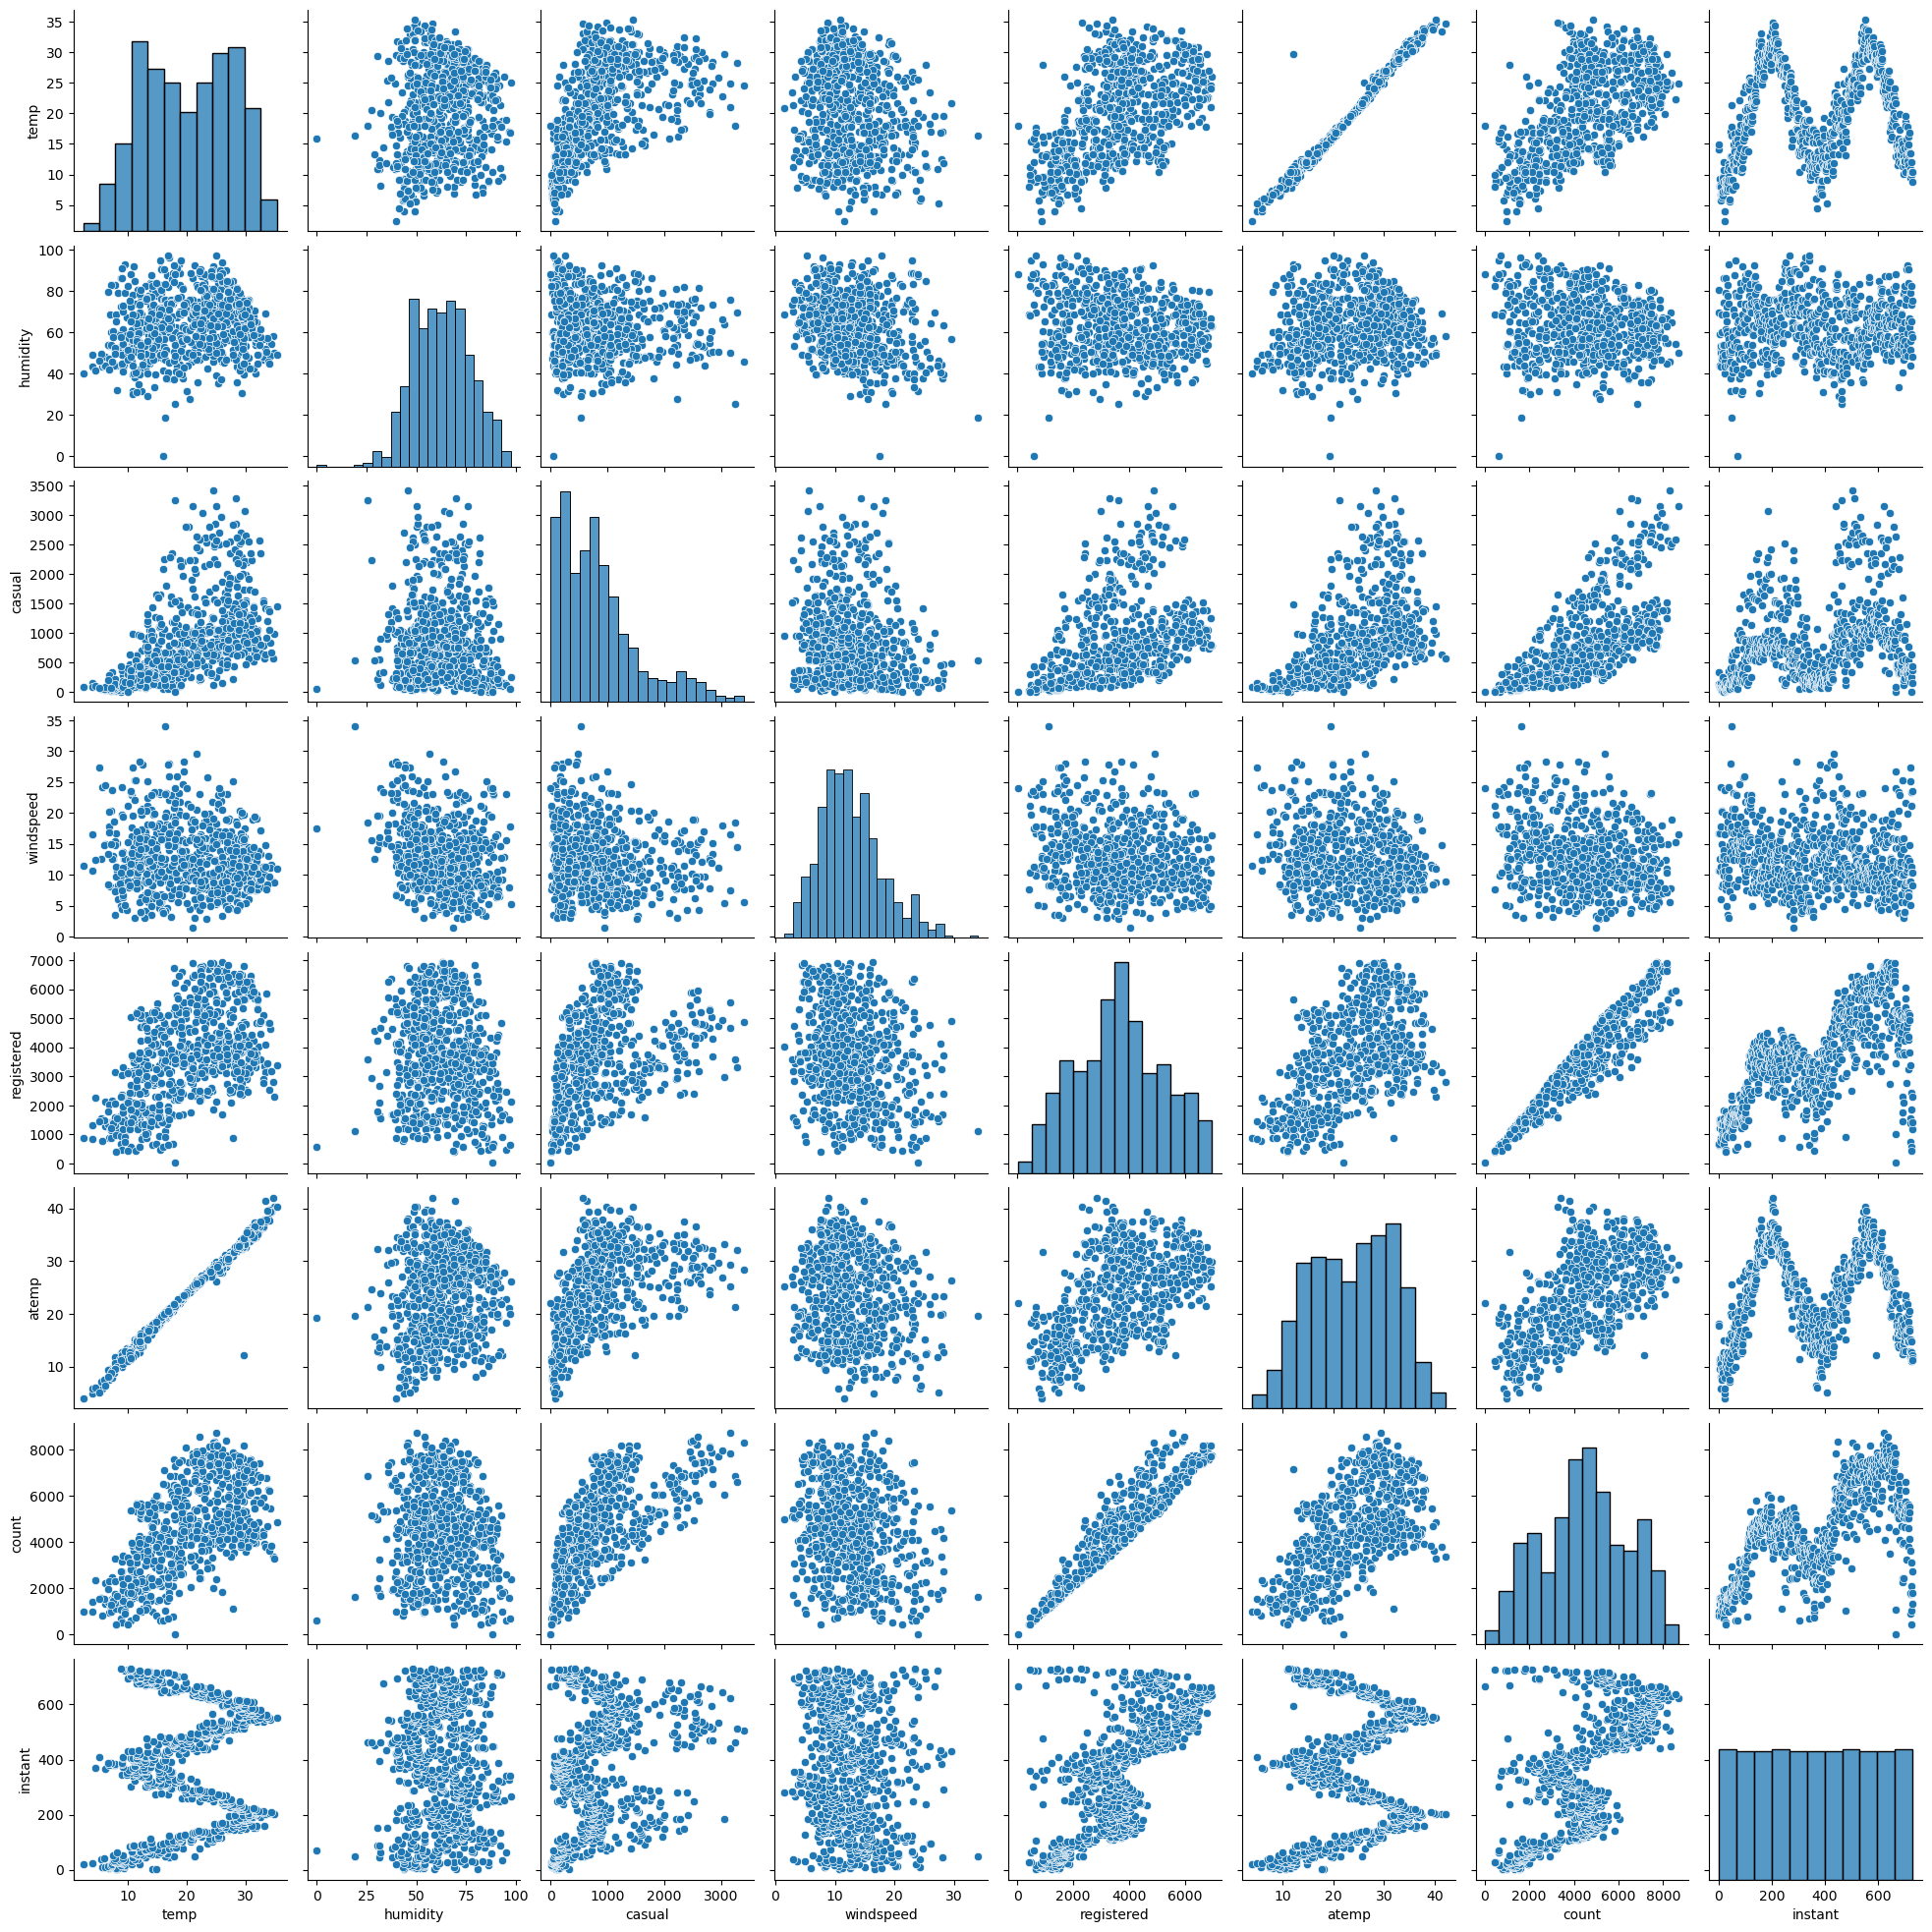

In [14]:
# from above the numerical values are 
#nvar =['temp','humidity','casual','windspeed','registered','atemp','count','instant']
sns.pairplot(df,vars =['temp','humidity','casual','windspeed','registered','atemp','count','instant'])
plt.show()

**Inference:**
- Looks like the temp and atemp has the highest corelation with the target variable cnt
- temp and atemp are highly co-related with each other
- As seen from the correlation map, output variable has a linear relationship with variables like temp, atemp.


**Visualising categorical variables  with the box plot**

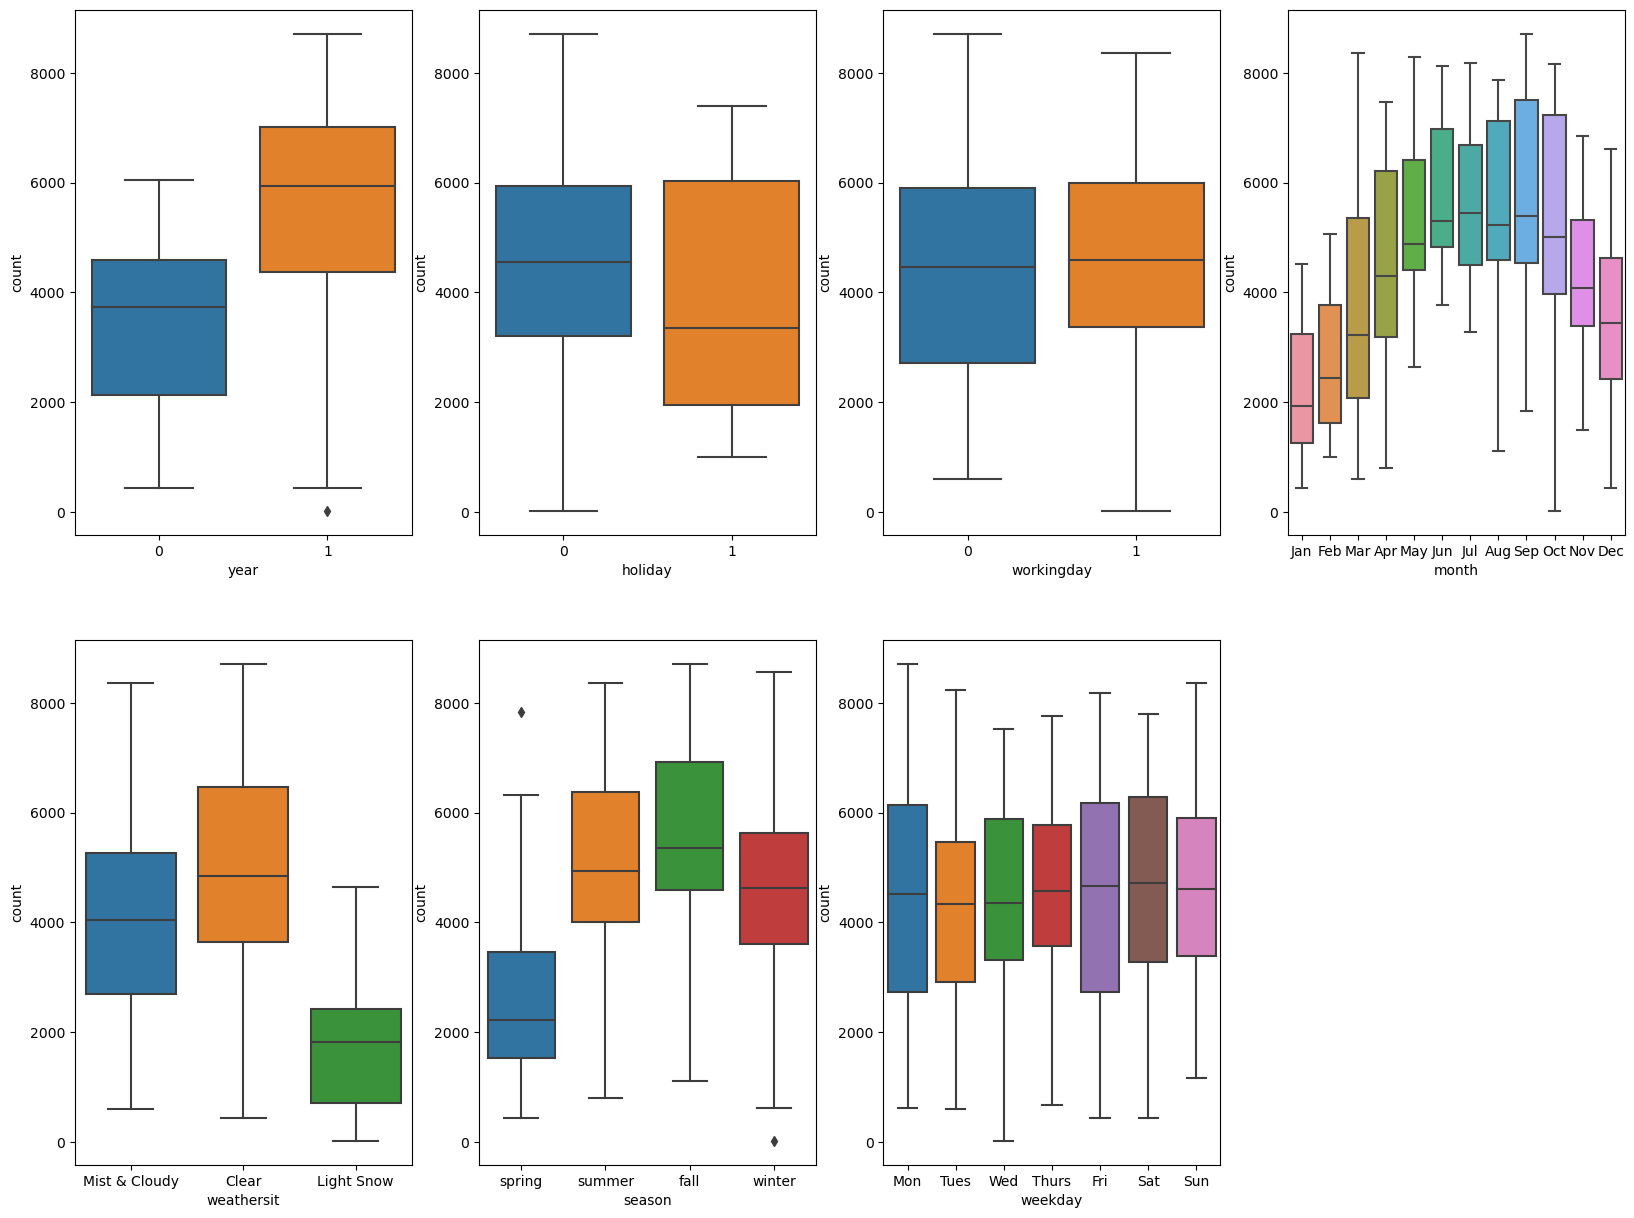

In [15]:
# plot between categorical variables and contnuous variable 

plt.figure(figsize =(20,15))
plt.subplot(2,4,1)
sns.boxplot(x='year',y='count', data =df)
plt.subplot(2,4,2)
sns.boxplot(x='holiday',y='count', data =df)
plt.subplot(2,4,3)
sns.boxplot(x='workingday',y='count', data =df)
plt.subplot(2,4,4)
sns.boxplot(x='month',y='count', data =df)
plt.subplot(2,4,5)
sns.boxplot(x='weathersit',y='count', data =df)
plt.subplot(2,4,6)
sns.boxplot(x='season',y='count', data =df)
plt.subplot(2,4,7)
sns.boxplot(x='weekday',y='count', data =df)
plt.show()




**Inference:**
Above plotting shows the relationship between the categorical and target var count of bikes 
1. Bike rentals are more during the fall season , followed by summer , winter and spring 
2. Bike rentals are more in the year 2019 when compared to 2018 
3. Bike rentals are more in clear weather 
4. Bike rentals are more on sat, wed , thu 


**Visualising categorical variables with the bar plot**

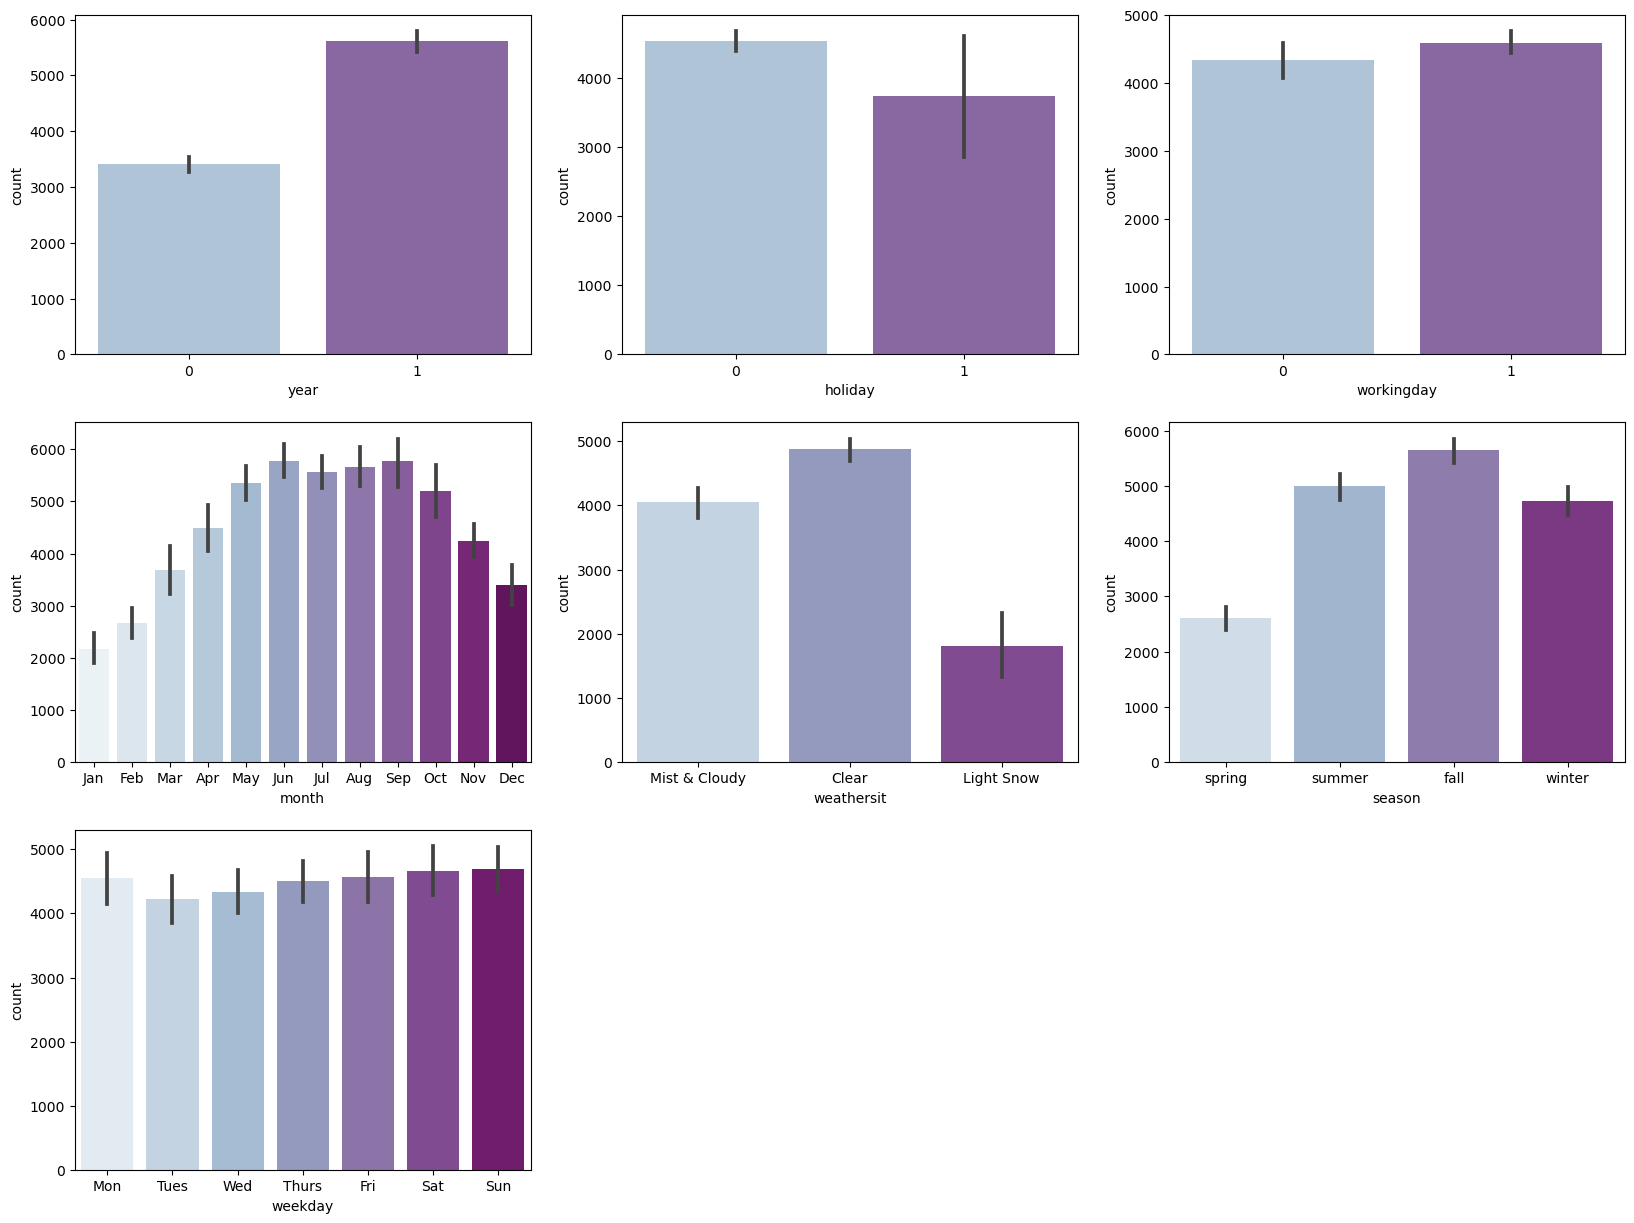

In [16]:
plt.figure(figsize =(20,15))
plt.subplot(3,3,1)
sns.barplot(x='year',y='count', data =df, palette = 'BuPu')
plt.subplot(3,3,2)
sns.barplot(x='holiday',y='count', data =df,palette = 'BuPu')
plt.subplot(3,3,3)
sns.barplot(x='workingday',y='count', data =df, palette = 'BuPu')
plt.subplot(3,3,4)
sns.barplot(x='month',y='count', data =df, palette = 'BuPu')
plt.subplot(3,3,5)
sns.barplot(x='weathersit',y='count', data =df, palette = 'BuPu')
plt.subplot(3,3,6)
sns.barplot(x='season',y='count', data =df, palette = 'BuPu')
plt.subplot(3,3,7)
sns.barplot(x='weekday',y='count', data =df, palette = 'BuPu')
plt.show()

**Visualising using scatter plot**

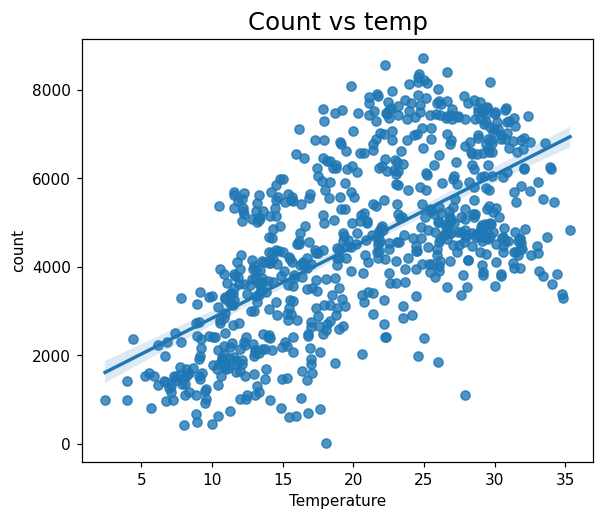

In [17]:

plt.figure(figsize=(6,5),dpi=110)
plt.title("Count vs temp",fontsize=16)
sns.regplot(data=df,y="count",x="temp")
plt.xlabel("Temperature")
plt.show()


**Inference**
- Demand for bikes is positively correlated to temp.
- We can see that cnt is linearly increasing with temp indicating linear relation.

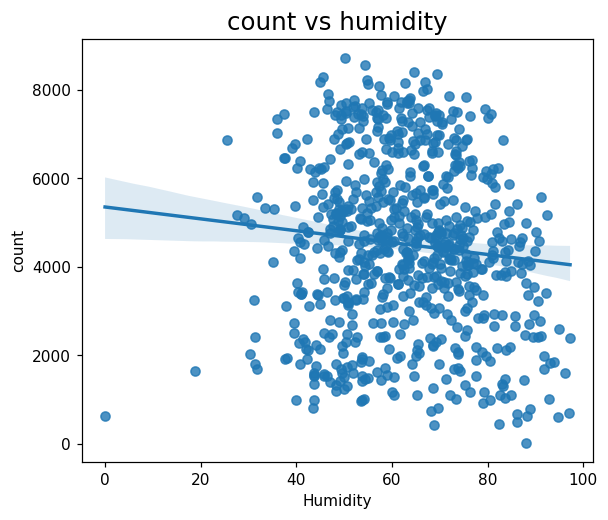

In [18]:

plt.figure(figsize=(6,5),dpi=110)
plt.title("count vs humidity",fontsize=16)
sns.regplot(data=df,y="count",x="humidity")
plt.xlabel("Humidity")
plt.show()

**Inference:**
- Humidity is values are more scattered around.
- Although we can see cnt decreasing with increase in humidity.

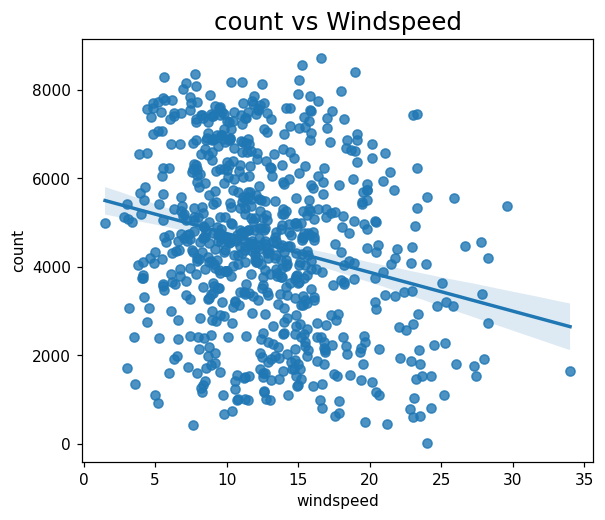

In [19]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("count vs Windspeed",fontsize=16)
sns.regplot(data=df,y="count",x="windspeed")
plt.show()

**Inference:**
- Windspeed is values are more scattered around.
- Although we can see cnt decreasing with increase in windspeed.

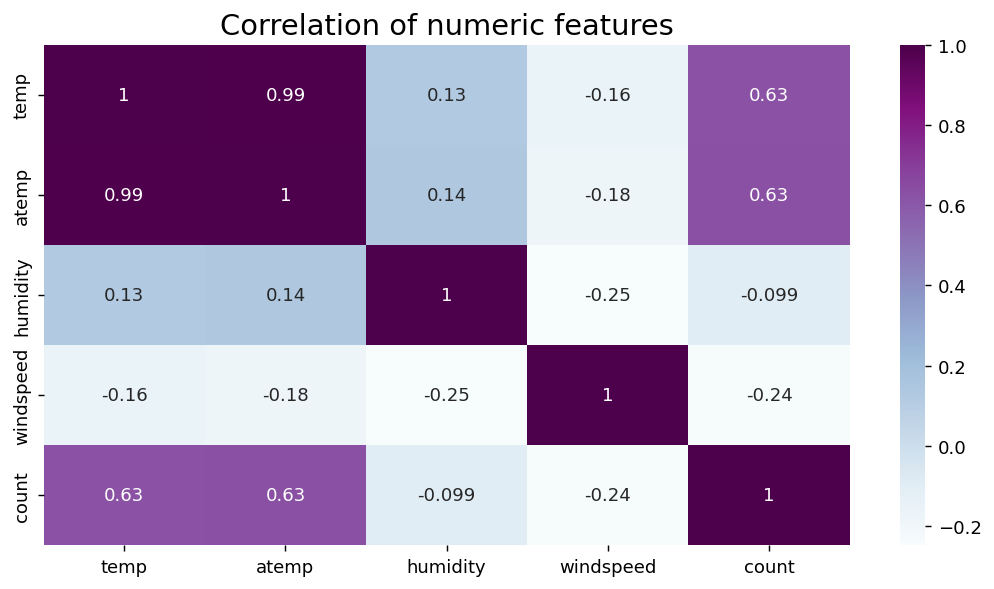

In [20]:
num_features = ["temp","atemp","humidity","windspeed","count"]
plt.figure(figsize=(10,5),dpi=130)
plt.title("Correlation of numeric features",fontsize=16)
sns.heatmap(df[num_features].corr(),annot= True,cmap="BuPu")
plt.show()

**Inference**
- Temp and Atemp are highly correlated, we can take an action to remove one of them, but lets keep them for further analysis.
- Temp and Atemp also have high correlation with cnt variable.

**Dropping unwanted columns**

Now lets plan to drop the unnecessary variables from the data set

1. Drop instance as it is a record index 
2. Drop dteday - we dont need a specific date to do the regression analysis as we already have the year and the month that should be provide the required insights 
3. Drop casual , registered - as count is there which is overall count of users on which we need to do the model fitting 
4. Drop atemp as temp is already is available is the accurate temp and we dont need do the analysis on the 'feels like' temp 


In [21]:
df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,Jan,0,Mon,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tues,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thurs,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [22]:
df=df.drop(['instant','atemp','casual','dteday','registered'], axis =1)
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,Jan,0,Mon,0,Mist & Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tues,0,Mist & Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thurs,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


In [23]:
df.dtypes

season         object
year            int64
month          object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
humidity      float64
windspeed     float64
count           int64
dtype: object

## **Step 2: Preparation of the data for model training**


**2.1 creating of the dummy variables for season,  month , weekday , weathersit**

In [24]:
months = pd.get_dummies(df.month, drop_first = True)
weathersits = pd.get_dummies(df.weathersit, drop_first = True)
weekdays = pd.get_dummies(df.weekday, drop_first = True)
seasons = pd.get_dummies(df.season, drop_first = True)



In [25]:
df=pd.concat([months,weekdays,weathersits,seasons,df], axis =1)
df.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Mon,0,Mist & Cloudy,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Tues,0,Mist & Cloudy,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Thurs,1,Clear,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


In [26]:
df.columns


Index(['Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Sep', 'Mon', 'Sat', 'Sun', 'Thurs', 'Tues', 'Wed', 'Light Snow',
       'Mist & Cloudy', 'spring', 'summer', 'winter', 'season', 'year',
       'month', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp',
       'humidity', 'windspeed', 'count'],
      dtype='object')

In [27]:
df.drop(['season','month','weekday','weathersit'], axis =1, inplace =True)
df.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


In [28]:
df.shape

(730, 29)

**check for correlation again**

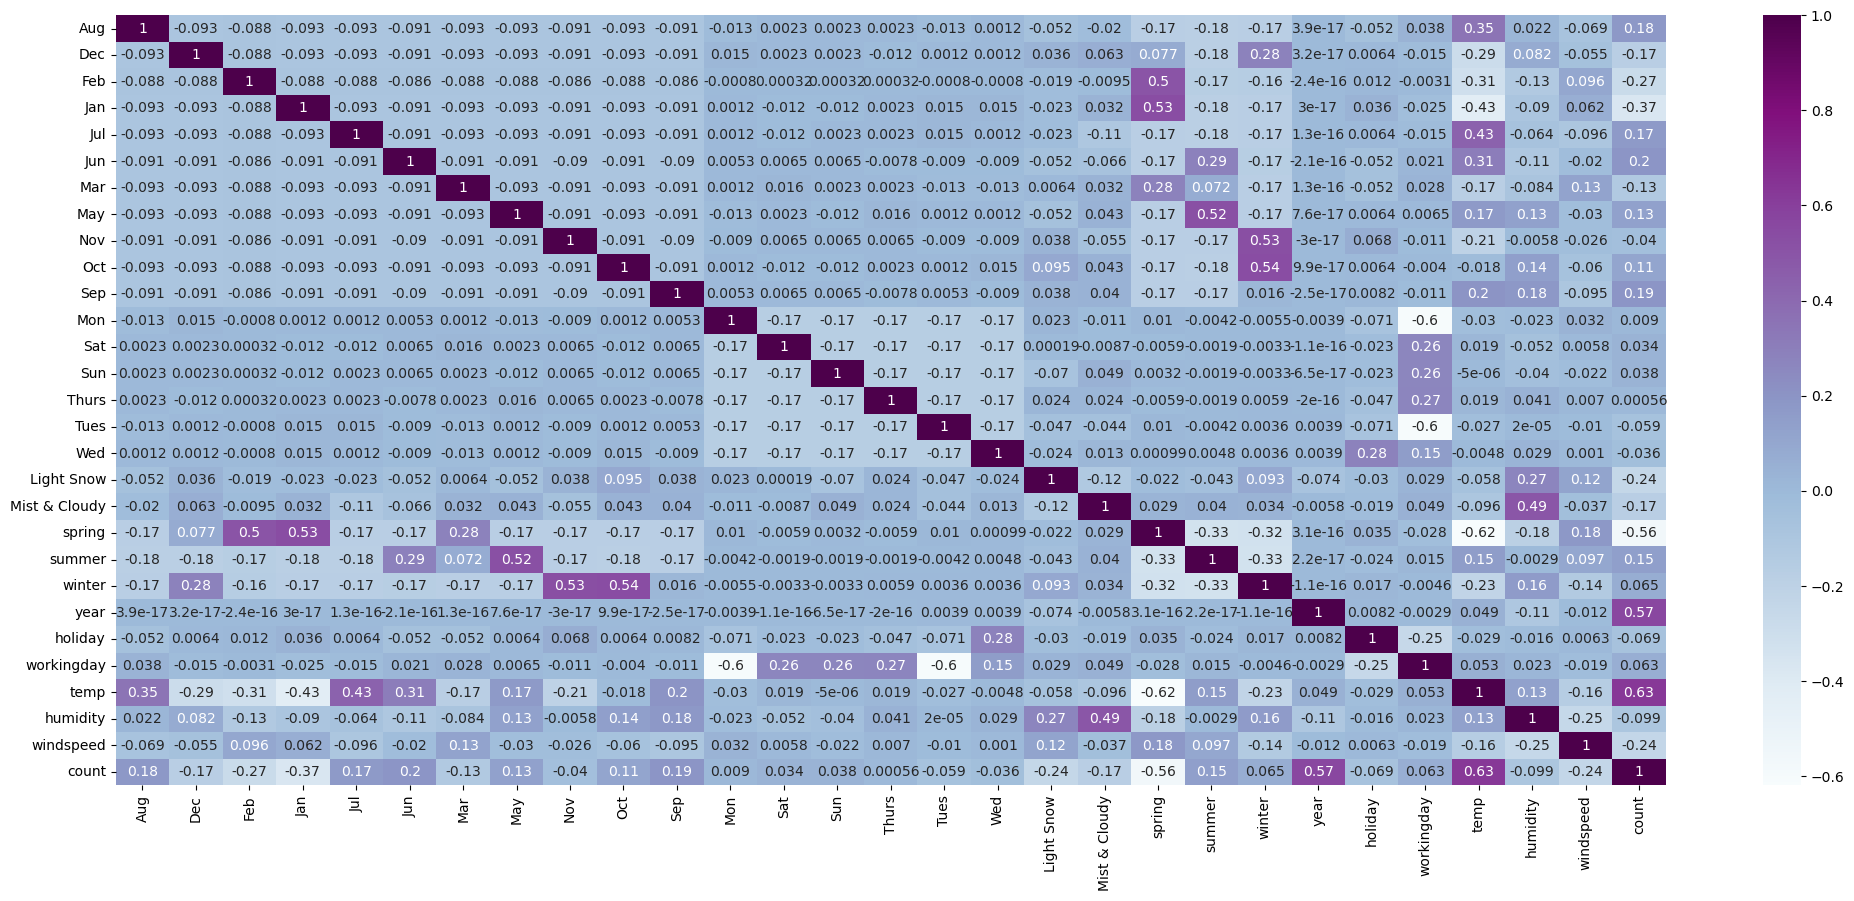

In [29]:
plt.figure(figsize =(25,10))
sns.heatmap(df.corr(),cmap='BuPu',annot= True)
plt.show()

**2.2 Model building :: Split the data into train and test**

In [30]:
df.shape

(730, 29)

In [31]:
# y contains only the target variable 
y= df.pop('count')

#X contains remaining all the independent variables 
X=df

#Train and Test split with 70:30 ration
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 42)

In [32]:
X.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,Mist & Cloudy,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed
0,0,0,0,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,14.110847,80.5833,10.749882
1,0,0,0,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,14.902598,69.6087,16.652113
2,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,8.050924,43.7273,16.636703
3,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,8.200000,59.0435,10.739832
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,9.305237,43.6957,12.522300


In [33]:
#checking shape and size for train and test 

print(X_train.shape)
print(X_test.shape)

(511, 28)
(219, 28)


**2.3 Model Building:: Feature scalling continouls variables** 

this is primarily to scale all the features in same scale to interpret easily 
columns that are continous to be scaled - temp, humidity, windspeed 

In [34]:
#scaling of continuous variables 
num_vars =['temp','humidity','windspeed']

#user normalized scaler to scale 
scalar = MinMaxScaler()

#Fit and transform the training data set

X_train[num_vars] = scalar.fit_transform(X_train[num_vars])

In [35]:
#descibe the XTrain and check - max shouldbe 1 and min should be 0 across all 
X_train.describe()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,Mist & Cloudy,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.00000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.074364,0.074364,0.074364,0.088063,0.091977,0.084149,0.062622,0.091977,0.091977,0.09002,...,0.346380,0.230920,0.258317,0.250489,0.520548,0.027397,0.669276,0.550874,0.654174,0.414873
std,0.262619,0.262619,0.262619,0.283664,0.289276,0.277883,0.242520,0.289276,0.289276,0.28649,...,0.476282,0.421834,0.438138,0.433719,0.500067,0.163398,0.470935,0.227231,0.143648,0.185619
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.354221,0.544598,0.281934
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.575304,0.659940,0.384732
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,1.000000,0.000000,1.000000,0.500000,1.000000,0.000000,1.000000,0.745079,0.756977,0.526481
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
X_train.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,Mist & Cloudy,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed
683,0,0,0,0,0,0,0,0,1,0,...,1,0,0,1,1,0,1,0.327133,0.639330,0.327101
645,0,0,0,0,0,0,0,0,0,1,...,1,0,0,1,1,1,0,0.403972,0.731215,0.419004
163,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0.717562,0.509660,0.708724
360,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,1,0.331287,0.785745,0.415925
640,0,0,0,0,0,0,0,0,0,1,...,1,0,0,1,1,0,1,0.745598,0.817947,0.110593


## **Step3 : Build Model and Train using RFE and Automated approach**


#### **Model1**

In [ ]:
# Use RFE to eliminate columns 

In [37]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [38]:
#cut down the number of features to 15 usign the automated approach 

rfe = RFE(estimator=lr, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)


In [39]:
X_train.columns[rfe.support_]

Index(['Dec', 'Jul', 'Mar', 'Nov', 'Sep', 'Mon', 'Light Snow', 'Mist & Cloudy',
       'spring', 'winter', 'year', 'workingday', 'temp', 'humidity',
       'windspeed'],
      dtype='object')

In [40]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Aug', False, 5),
 ('Dec', True, 1),
 ('Feb', False, 7),
 ('Jan', False, 11),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', True, 1),
 ('May', False, 3),
 ('Nov', True, 1),
 ('Oct', False, 4),
 ('Sep', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 13),
 ('Sun', False, 8),
 ('Thurs', False, 6),
 ('Tues', False, 10),
 ('Wed', False, 12),
 ('Light Snow', True, 1),
 ('Mist & Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', False, 9),
 ('winter', True, 1),
 ('year', True, 1),
 ('holiday', False, 2),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [41]:
# columns where FRE support is True 
col = X_train.columns[rfe.support_]
col

Index(['Dec', 'Jul', 'Mar', 'Nov', 'Sep', 'Mon', 'Light Snow', 'Mist & Cloudy',
       'spring', 'winter', 'year', 'workingday', 'temp', 'humidity',
       'windspeed'],
      dtype='object')

In [42]:
# where columns are false 
X_train.columns[~rfe.support_]

Index(['Aug', 'Feb', 'Jan', 'Jun', 'May', 'Oct', 'Sat', 'Sun', 'Thurs', 'Tues',
       'Wed', 'summer', 'holiday'],
      dtype='object')

**Building the model using the statsmodel for the detailed statistics**

In [43]:
#creating X_train dataframe with RFE selected variables 
X_train_rfe = X_train[col]

In [44]:
#Adding constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [45]:
# running the linear model 
lm = sm.OLS(y_train, X_train_rfe).fit()

In [46]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     177.2
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          6.53e-188
Time:                        16:28:41   Log-Likelihood:                -4119.6
No. Observations:                 511   AIC:                             8271.
Df Residuals:                     495   BIC:                             8339.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2929.1638    308.613      9.491      0.000    2322.810    3535.517
Dec            -529.5245    149.138     -3.551      0.000    -822.545    -236.504
Jul            -458.2192    139.497     -3.285      0.001    -732.298    -184.141
Mar             427.2033    149.984      2.848      0.005     132.520     721.887
Nov            -699.8859    156.762     -4.465      0.000   -1007.886    -391.886
Sep             458.1871    128.507      3.565      0.000     205.700     710.674
Mon             442.7819    121.273      3.651      0.000     204.509     681.055
Light Snow    -1932.4143    233.256     -8.285      0.000   -2390.709   -1474.120
Mist & Cloudy  -500.7741     91.184     -5.492      0.000    -679.929    -321.619
spring        -1317.3460    139.008     -9.477      0.000   -1590.465   -1044.227
winter          762.8866    118.194      6.455      0.000     530.663     995.110
year           1967.0365     70.168     28.033      0.000    1829.172    2104.901
workingday      380.5546     92.800      4.101      0.000     198.225     562.884
temp           3533.0168    286.857     12.316      0.000    2969.410    4096.624
humidity      -1273.4057    328.939     -3.871      0.000   -1919.694    -627.118
windspeed      -996.9280    204.722     -4.870      0.000   -1399.159    -594.697
==============================================================================
Omnibus:                       77.630   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.272
Skew:                          -0.803   Prob(JB):                     1.94e-39
Kurtosis:                       5.407   Cond. No.                         22.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Check for VIP**

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train_rfe.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(len(X_train_rfe.columns))]
vif_data

,Feature,VIF
0,const,80.086220
1,Dec,1.287379
2,Jul,1.366563
3,Mar,1.110353
4,Nov,1.725769
5,Sep,1.137501
6,Mon,1.582686
7,Light Snow,1.303547
8,Mist & Cloudy,1.582855
9,spring,2.885638


In [48]:
#Drop const

X_train_rfe = X_train_rfe.drop(['const'], axis=1)


In [49]:
#calculate the VIFs for the new model 
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train_rfe.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(len(X_train_rfe.columns))]
vif_data['VIF'] = round(vif_data['VIF'], 2)
vif_data = vif_data.sort_values(by = "VIF", ascending = False)
vif_data


,Feature,VIF
13,humidity,24.42
12,temp,18.04
14,windspeed,5.18
11,workingday,4.58
8,spring,2.77
9,winter,2.74
7,Mist & Cloudy,2.24
10,year,2.09
3,Nov,1.84
5,Mon,1.78


In [50]:
#Humidity can be dropped as it is insignificant by looking at very high VIF 

X_train_rfe2 = X_train_rfe.drop(['humidity'],axis=1)

#### **Model 2**

In [51]:
#Build model 2
# add constant 
X_train_rfe2 = sm.add_constant(X_train_rfe2)
lm2 = sm.OLS(y_train, X_train_rfe2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     183.6
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          7.33e-186
Time:                        16:29:23   Log-Likelihood:                -4127.2
No. Observations:                 511   AIC:                             8284.
Df Residuals:                     496   BIC:                             8348.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2171.9392    242.051      8.973      0.000    1696.367    2647.512
Dec            -566.3977    150.917     -3.753      0.000    -862.913    -269.882
Jul            -411.0550    140.909     -2.917      0.004    -687.907    -134.202
Mar             461.1609    151.823      3.037      0.003     162.865     759.457
Nov            -700.3413    158.957     -4.406      0.000   -1012.652    -388.030
Sep             410.3983    129.704      3.164      0.002     155.562     665.235
Mon             457.5735    122.910      3.723      0.000     216.085     699.062
Light Snow    -2307.2201    215.185    -10.722      0.000   -2730.007   -1884.433
Mist & Cloudy  -704.6812     75.474     -9.337      0.000    -852.970    -556.393
spring        -1340.7244    140.821     -9.521      0.000   -1617.404   -1064.044
winter          719.5768    119.311      6.031      0.000     485.160     953.994
year           2005.3937     70.438     28.470      0.000    1867.000    2143.787
workingday      396.5404     94.006      4.218      0.000     211.842     581.239
temp           3338.9989    286.399     11.659      0.000    2776.293    3901.704
windspeed      -763.8912    198.411     -3.850      0.000   -1153.721    -374.061
==============================================================================
Omnibus:                       76.453   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.676
Skew:                          -0.782   Prob(JB):                     5.84e-40
Kurtosis:                       5.457   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
#drop constant 

X_train_rfe2 = X_train_rfe2.drop(['const'], axis = 1)

In [53]:
#calculate VIF 
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train_rfe2.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_rfe2.values,i) for i in range(len(X_train_rfe2.columns))]
vif_data['VIF'] = round(vif_data['VIF'], 2)
vif_data = vif_data.sort_values(by = "VIF", ascending = False)
vif_data

,Feature,VIF
12,temp,7.73
13,windspeed,5.15
11,workingday,4.49
9,winter,2.41
10,year,2.09
8,spring,1.91
3,Nov,1.80
5,Mon,1.75
7,Mist & Cloudy,1.58
1,Jul,1.46


 
 **Inference**
 
 **windspeed seems to be insignificant by looking at the high VIF and negative correlation with the count which can be dropped**

#### **Model 3**

In [54]:
# drop windspeed 
X_train_rfe3 = X_train_rfe2.drop(['windspeed'], axis = 1)


In [55]:
#build the model 
X_train_rfe3 = sm.add_constant(X_train_rfe3)
#X_train_rfe33 = X_train_rfe3
lm3 =sm.OLS(y_train, X_train_rfe3).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     191.3
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          7.45e-184
Time:                        16:29:34   Log-Likelihood:                -4134.7
No. Observations:                 511   AIC:                             8297.
Df Residuals:                     497   BIC:                             8357.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1729.6771    216.000      8.008      0.000    1305.292    2154.062
Dec            -517.4872    152.458     -3.394      0.001    -817.029    -217.945
Jul            -384.6474    142.686     -2.696      0.007    -664.989    -104.305
Mar             481.1603    153.830      3.128      0.002     178.923     783.398
Nov            -704.2418    161.149     -4.370      0.000   -1020.858    -387.625
Sep             444.7375    131.184      3.390      0.001     186.994     702.481
Mon             454.2169    124.604      3.645      0.000     209.401     699.033
Light Snow    -2422.6212    216.031    -11.214      0.000   -2847.067   -1998.176
Mist & Cloudy  -707.6302     76.513     -9.249      0.000    -857.958    -557.302
spring        -1307.2029    142.493     -9.174      0.000   -1587.166   -1027.240
winter          794.3968    119.343      6.656      0.000     559.917    1028.876
year           2001.7085     71.404     28.033      0.000    1861.417    2142.000
workingday      407.5233     95.260      4.278      0.000     220.361     594.686
temp           3499.2777    287.271     12.181      0.000    2934.862    4063.693
==============================================================================
Omnibus:                       79.971   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.052
Skew:                          -0.803   Prob(JB):                     2.68e-43
Kurtosis:                       5.574   Cond. No.                         16.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#lm3.summary()

In [56]:
X_train_rfe3 = X_train_rfe3.drop(['const'], axis =1)

In [57]:
#Calculate VIF 
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train_rfe3.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_rfe3.values,i) for i in range(len(X_train_rfe3.columns))]
vif_data['VIF'] = round(vif_data['VIF'], 2)
vif_data = vif_data.sort_values(by = "VIF", ascending = False)
vif_data

,Feature,VIF
12,temp,5.89
11,workingday,4.43
9,winter,2.40
10,year,2.08
3,Nov,1.77
5,Mon,1.72
7,Mist & Cloudy,1.57
8,spring,1.56
1,Jul,1.43
0,Dec,1.33


**Inference:**
- This will be the final model
- The p values represent the significance of the variables and VIF which represent how variables are correlated to each other. Based on these two parameters we decided which variable to drop.
- The VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

In [ ]:
# we can try dropping temp and see how sigficantly the R2 dropps that is more like a negative testing 


## **Step 4: Residual analysis of the train data**

One of the primary assumption of linear regression is that the "error terms " should also be normally distributed.

Plot a histogram for the "error terms " to review the insights 

In [58]:
X_train_rfe3.head()

,Dec,Jul,Mar,Nov,Sep,Mon,Light Snow,Mist & Cloudy,spring,winter,year,workingday,temp
683,0,0,0,1,0,0,0,1,0,1,1,1,0.327133
645,0,0,0,0,0,0,0,1,0,1,1,0,0.403972
163,0,0,0,0,0,0,0,0,0,0,0,1,0.717562
360,1,0,0,0,0,0,0,1,1,0,0,1,0.331287
640,0,0,0,0,0,0,0,1,0,1,1,1,0.745598


In [59]:
# y train predicted 
y_train_pred = lr.predict(X_train)

<Figure size 640x480 with 0 Axes>

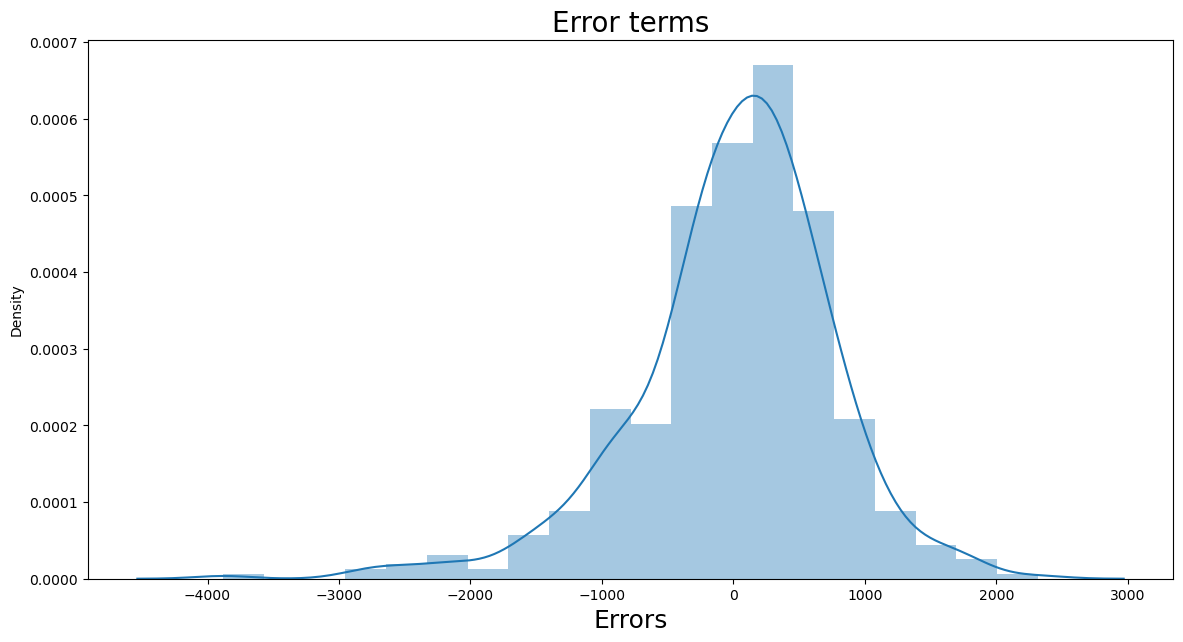

In [60]:
#plot histogram of error terms 
fig =plt.figure()
plt.figure(figsize=(14,7))
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error terms', fontsize =20)
plt.xlabel('Errors',fontsize = 18)
plt.show()

**Inference**

Errors are normally distribured here with mean 0. So everything seems to be fine

## **Step5: Making Final Predictions**

Applying scaling on the test sets 

In [61]:
#create numeric variables list 
num_vars = ['temp','humidity','windspeed']

#fit on data 
X_test[num_vars] = scalar.transform(X_test[num_vars])
X_test.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,Mist & Cloudy,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed
468,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0.543115,0.518248,0.422104
148,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0.758058,0.843709,0.479765
302,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0.324018,0.642765,0.386287
355,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,1,0.453814,0.780592,0.062325
515,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,1,0.773634,0.507943,0.433030


In [62]:
X_test.shape

(219, 28)

In [63]:
X_test_new = X_test[X_train_rfe3.columns]

In [64]:
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.head()

,const,Dec,Jul,Mar,Nov,Sep,Mon,Light Snow,Mist & Cloudy,spring,winter,year,workingday,temp
468,1.0,0,0,0,0,0,1,0,0,0,0,1,0,0.543115
148,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0.758058
302,1.0,0,0,0,0,0,0,0,0,0,1,0,0,0.324018
355,1.0,1,0,0,0,0,0,0,1,1,0,0,1,0.453814
515,1.0,0,0,0,0,0,0,0,0,0,0,1,1,0.773634


In [65]:
#making predictions 

y_pred = lm3.predict(X_test_new1)

Finding R-squared and Adjusted R-squared for the test set 

In [66]:
#Evaluate R-square for test
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8138458670945372

### **R^2 = 0.81**

In [67]:
#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables

Adj_r2=1-(1-0.8138458)*(14-1)/(14-1-1)
print(Adj_r2)

0.7983329499999999


### **Adjusted R^2 = 0.79**

## **Step 6 : Model Evaluation**

Text(0, 0.5, 'y_pred')

<Figure size 640x480 with 0 Axes>

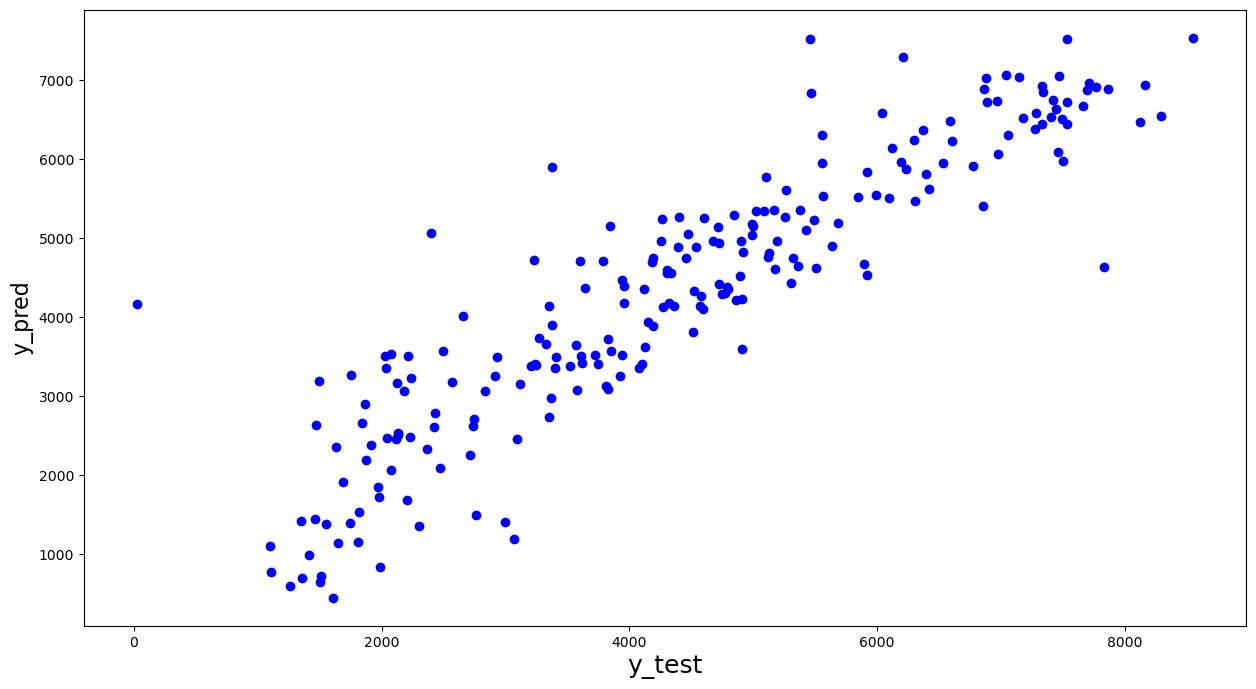

In [68]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_pred,color='blue')
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

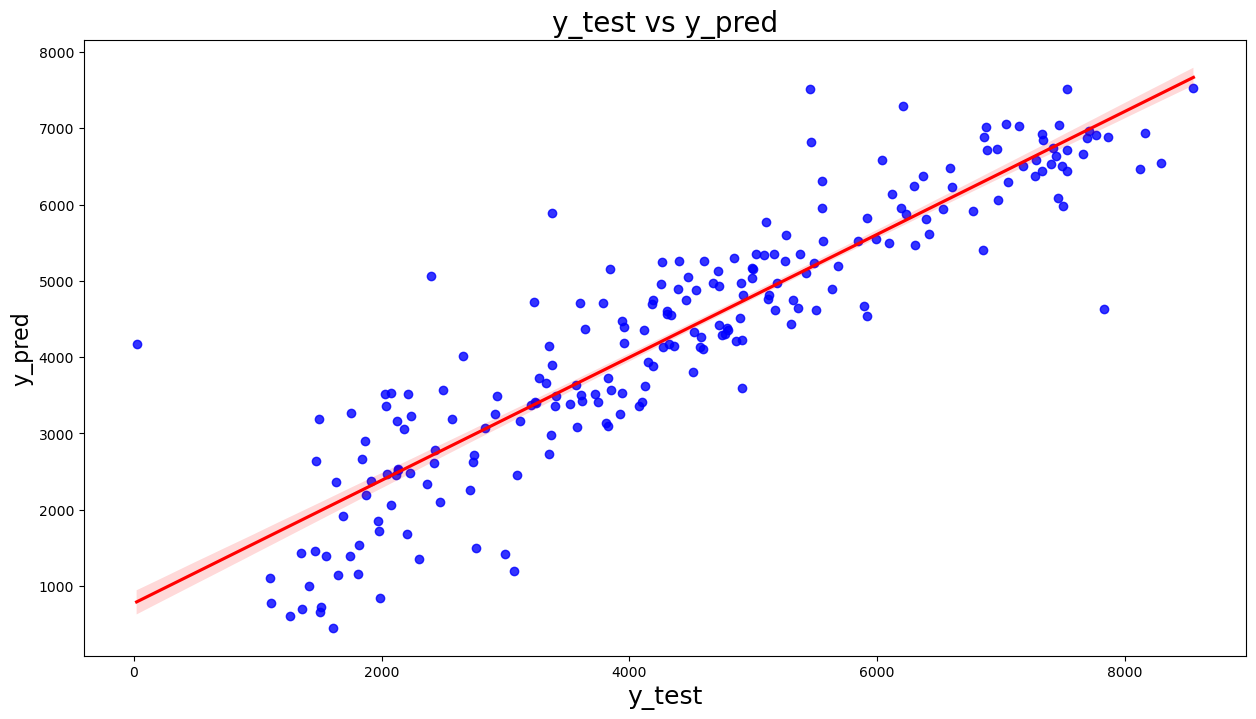

In [69]:
#Regression plot
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

### **Final results and comparision between Train model and test :**
    
    - Train R^2 : 0.833
    - Train Adj R^2 : 0.829
    - Test R^2 : 0.813
    - Test Adj R^2 : 0.798
    - Different in R^2 between train and test : ~ 2%m
    - Difference in Adj R^2 between train and test :  ~3% which is less than 5%
    
   ### In summary, considering the above points , this seems to be final acceptable model

## **Final summary analysing the above model, the comapany should focus on the following features:**

- Company should focus on expanding business during Spring.

- Company should focus on expanding business during September.

- Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.

- There would be less bookings during Light Snow or Rain, they could probably use this time to serive the bikes without having business impact.

- Hence when the situation comes back to normal, the company should come up with new offers during spring when the weather is pleasant and also advertise a little for September as this is when business would be at its best.

#### **Significant variables to predict the demand for shared bikes**

- holiday
- temp
- humidity
- windspeed
- Season
- months(Dec, Jul, Mar,m Nov,Sep)
- Year (2019)
- Sunday
- weathersit( Light Snow, Mist + Cloudy)